In [213]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


train = pd.read_csv('train.csv', index_col=0)
test = pd.read_csv('test.csv', index_col=0)
sample_submission = pd.read_csv('sample_submission.csv', index_col=0)
scaler = StandardScaler()

In [2]:
column_number = {}
for i, column in enumerate(sample_submission.columns):
    column_number[column] = i
    
def to_number(x, dic):
    return dic[x]

train['type_num'] = train['type'].apply(lambda x: to_number(x, column_number))

In [3]:
train_x = train.drop(columns=['type', 'type_num'], axis=1)
train_y = train['type_num']
test_x = test
train_x_sc = scaler.fit_transform(train_x)
test_x_sc = scaler.transform(test_x)

In [65]:
train.head()

,type,fiberID,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,...,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z
id,,,,,,,,,,,,,,,,,,,,,
0,QSO,601,23.198224,21.431953,21.314148,21.176553,21.171444,22.581309,21.644453,21.657571,...,22.504317,21.431636,21.478312,21.145409,20.422446,22.749241,21.465534,21.364187,21.020605,21.147340
1,QSO,788,21.431355,20.708104,20.678850,20.703420,20.473229,21.868797,21.029773,20.967054,...,21.360701,20.778968,20.889705,20.639812,20.646660,21.492955,20.758527,20.753925,20.693389,20.512314
2,QSO,427,17.851451,16.727898,16.679677,16.694640,16.641788,18.171890,17.033098,16.999682,...,17.867253,16.738784,16.688874,16.744210,16.808006,17.818063,16.697434,16.641249,16.660177,16.688928
3,QSO,864,20.789900,20.040371,19.926909,19.843840,19.463270,21.039030,20.317165,20.217898,...,20.433907,19.993727,19.985531,19.750917,19.455117,20.770711,20.001699,19.889798,19.758113,19.552855
4,STAR_RED_DWARF,612,26.454969,23.058767,21.471406,19.504961,18.389096,25.700632,23.629122,21.742750,...,25.859229,22.426929,21.673551,19.610012,18.376141,24.877052,23.147993,21.475342,19.487330,18.375655


In [70]:
train.describe()

,fiberID,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,...,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z
count,199991.000000,1.999910e+05,199991.000000,199991.000000,199991.000000,199991.000000,1.999910e+05,199991.000000,199991.000000,199991.000000,...,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000
mean,360.830152,-6.750146e+00,18.675373,18.401235,18.043495,17.663526,1.084986e+01,19.072693,19.134483,18.183331,...,21.837903,18.454136,18.481525,17.686617,17.699207,20.110991,18.544375,18.181544,17.692395,17.189281
std,225.305890,1.187678e+04,155.423024,127.128078,116.622194,123.735298,4.172116e+03,749.256162,90.049058,122.378972,...,789.472333,154.376277,97.240448,145.730872,142.691880,122.299062,161.728183,133.984475,131.183416,133.685138
min,1.000000,-5.310802e+06,-40022.466071,-27184.795793,-26566.310827,-24878.828280,-1.864766e+06,-215882.917191,-21802.656144,-20208.516262,...,-24463.431833,-25958.752324,-23948.588523,-40438.184078,-30070.729379,-26236.578659,-36902.402336,-36439.638493,-38969.416822,-26050.710196
25%,174.000000,1.965259e+01,18.701180,18.048572,17.747663,17.425523,1.994040e+01,18.902851,18.259352,17.903615,...,19.247795,18.113933,17.479794,17.050294,16.804705,19.266214,18.076120,17.423425,16.977671,16.705774
50%,349.000000,2.087136e+01,19.904235,19.454492,19.043895,18.611799,2.104910e+01,20.069038,19.631419,19.188763,...,20.366848,19.586559,19.182789,18.693370,18.174592,20.406840,19.547674,19.143156,18.641756,18.100997
75%,526.000000,2.216043e+01,21.150297,20.515936,20.073528,19.883760,2.233754e+01,21.385830,20.773911,20.331419,...,21.797480,21.004397,20.457491,20.019112,19.807652,21.992898,20.962386,20.408140,19.968846,19.819554
max,1000.000000,1.877392e+04,3538.984910,3048.110913,4835.218639,9823.740407,4.870154e+03,248077.513380,12084.735440,8059.638535,...,298771.019041,12139.815877,7003.136546,9772.190537,17403.789263,14488.251976,10582.058590,12237.951703,4062.499371,7420.534172


In [238]:
test.describe().iloc[7,:]

fiberID       1000.000000
psfMag_u        37.681143
psfMag_g       182.654452
psfMag_r        31.883768
psfMag_i        47.227391
psfMag_z        34.946057
fiberMag_u      41.169991
fiberMag_g      47.160580
fiberMag_r      29.266687
fiberMag_i      31.146742
fiberMag_z      26.478564
petroMag_u      65.392087
petroMag_g     106.962571
petroMag_r      41.850633
petroMag_i      52.221528
petroMag_z      74.747394
modelMag_u      32.641240
modelMag_g      28.814977
modelMag_r      27.579664
modelMag_i      26.471555
modelMag_z      24.461973
Name: max, dtype: float64

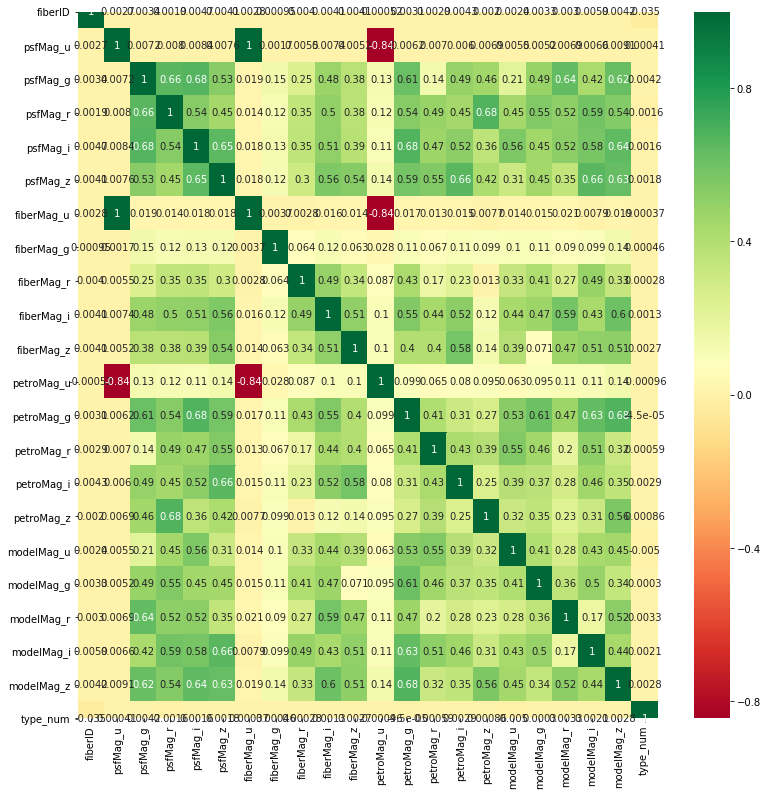

In [4]:
corrmat = train.corr()
plt.figure(figsize=(13,13))
g = sns.heatmap(corrmat,annot=True,cmap="RdYlGn")

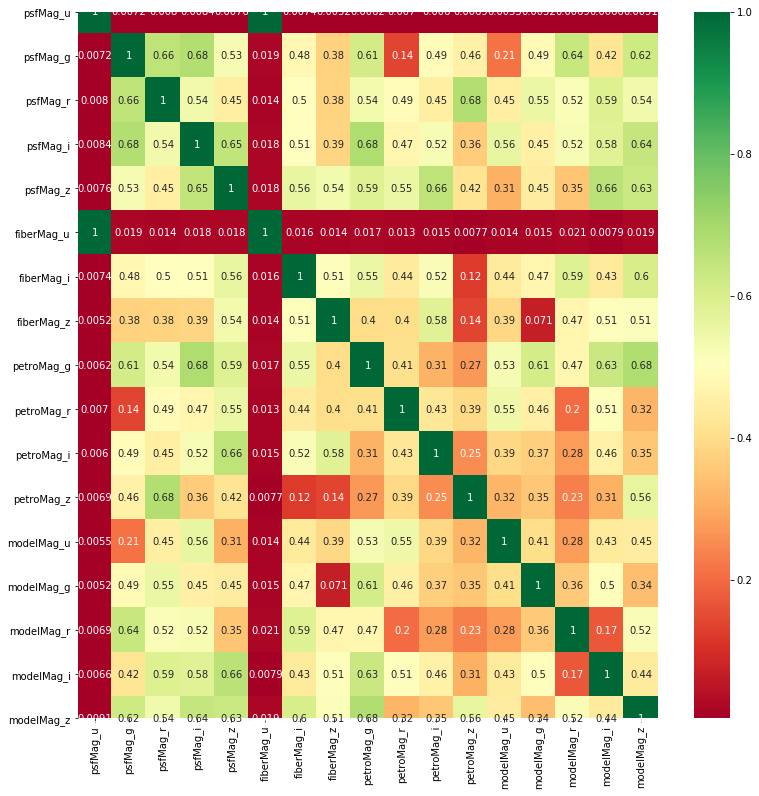

In [5]:

top_corr_features = []
corr_col = corrmat.columns
for col in corr_col:
    if (corrmat[col].sort_values(ascending=False)[1] > 0.5)&(corrmat[col].sort_values(ascending=False)[1] < 1):
        top_corr_features.append(col)
plt.figure(figsize=(13,13))
g = sns.heatmap(train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

                      type
QSO                  49680
GALAXY               37347
SERENDIPITY_BLUE     21760
SPECTROPHOTO_STD     14630
REDDEN_STD           14618
STAR_RED_DWARF       13750
STAR_BHB             13500
SERENDIPITY_FIRST     7132
ROSAT_D               6580
STAR_CATY_VAR         6506
SERENDIPITY_DISTANT   4654
STAR_CARBON           3257
SERENDIPITY_RED       2562
STAR_WHITE_DWARF      2160
STAR_SUB_DWARF        1154
STAR_BROWN_DWARF       500
SKY                    127
SERENDIPITY_MANUAL      61
STAR_PN                 13


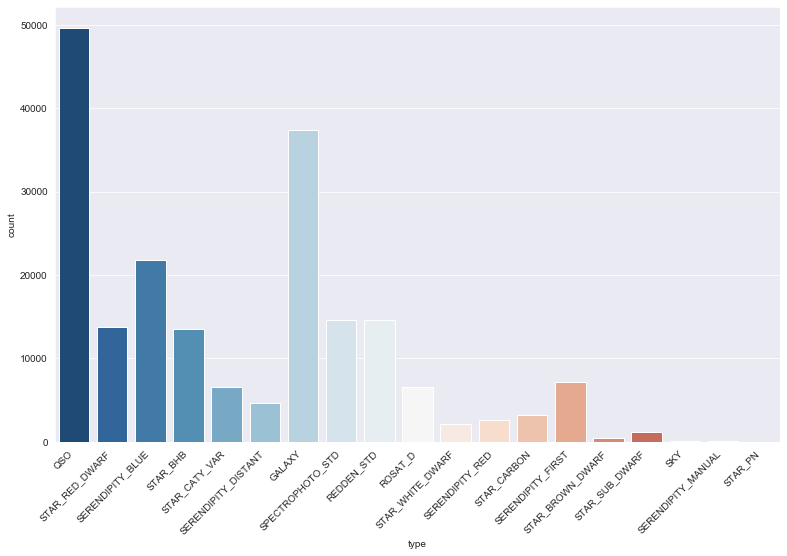

In [260]:
print(pd.DataFrame(train["type"].value_counts()))
plt.figure(figsize=(13,8))
plt.xticks(rotation =  45 ,horizontalalignment='right')
sns.set_style('whitegrid')
sns.countplot(x='type',data=train,palette='RdBu_r')

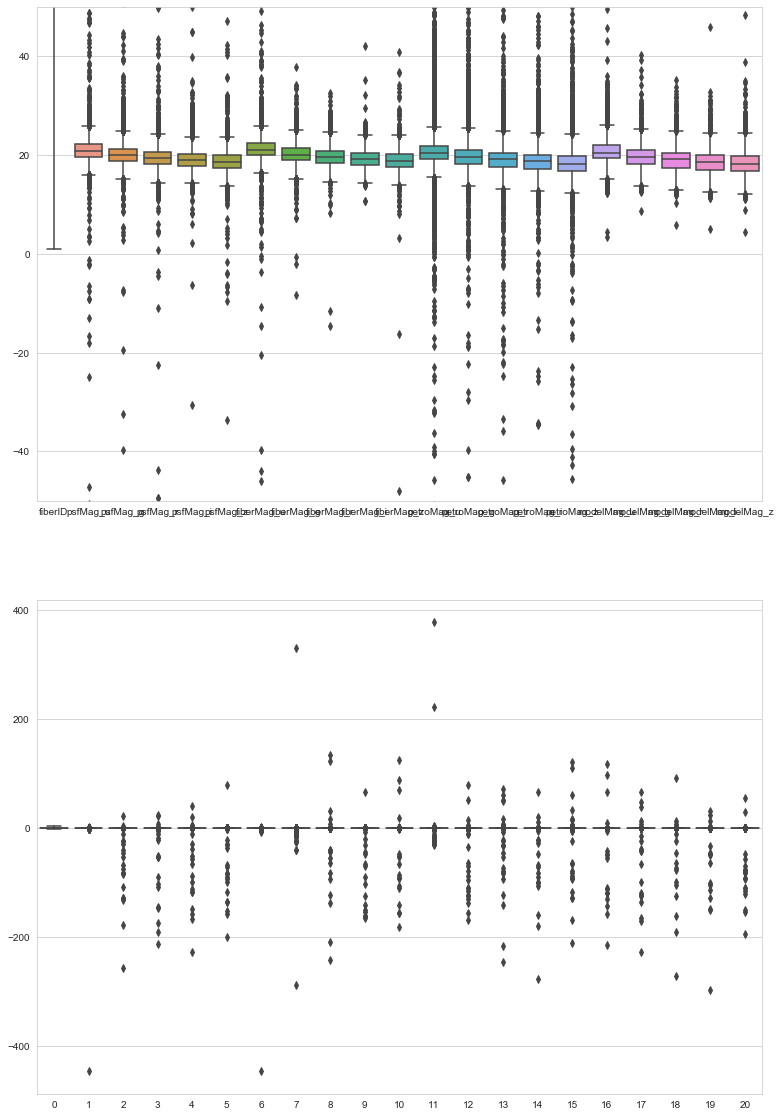

In [262]:
plt.figure(figsize=(13,20))
plt.subplot(211)
plt.ylim(-50,50)
sns.boxplot(data=pd.DataFrame(train_x))
plt.subplot(212)
sns.boxplot(data=pd.DataFrame(train_x_sc))

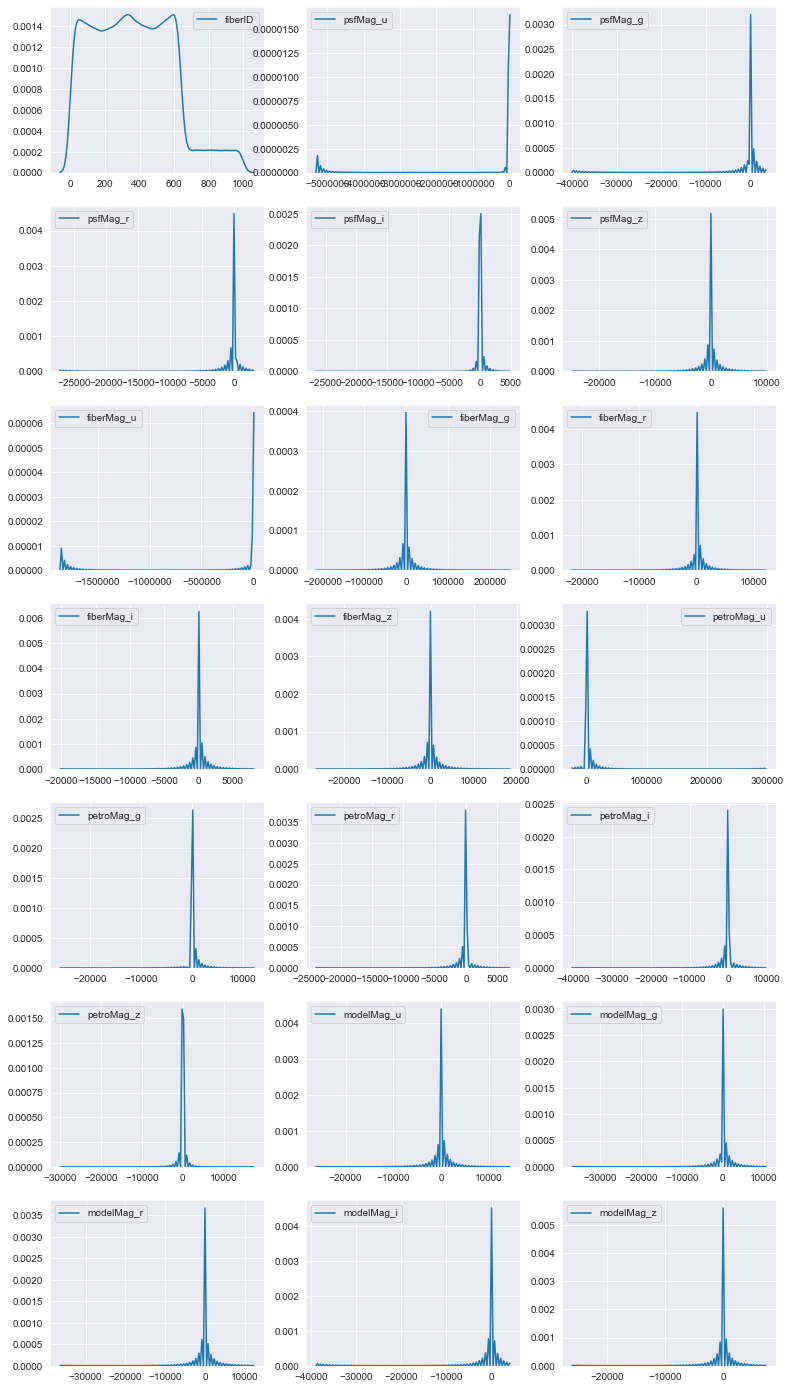

In [220]:
sns.set_style("darkgrid")
plt.figure(figsize=(13,25))
for i in range(21):
    plt.subplot(7,3,i+1)
    g = sns.kdeplot(pd.DataFrame(train_x).iloc[:,i],)

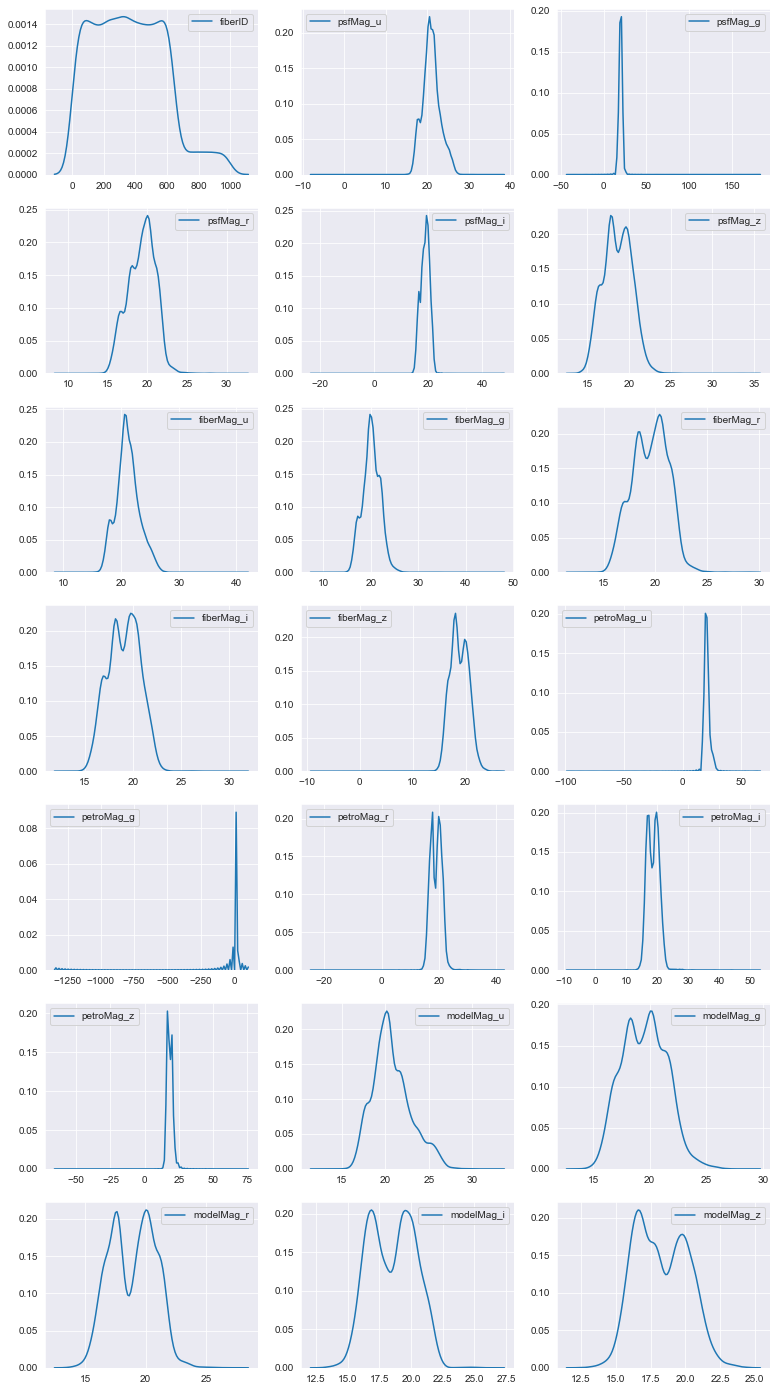

In [84]:
plt.figure(figsize=(13,25))
for i in range(21):
    plt.subplot(7,3,i+1)
    g = sns.kdeplot(pd.DataFrame(test_x).iloc[:,i],)

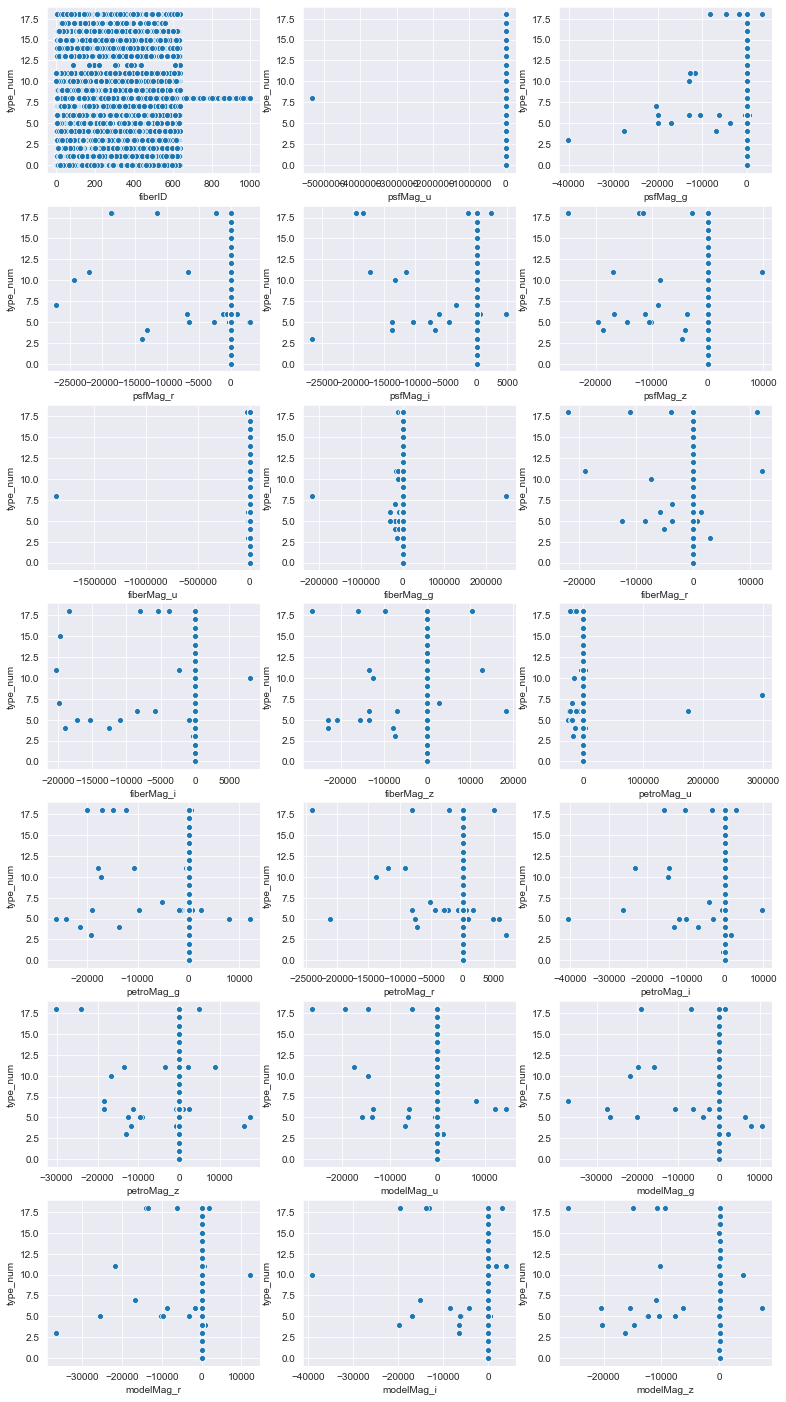

In [94]:
plt.figure(figsize=(13,25))
for i in range(21):
    plt.subplot(7,3,i+1)
    sns.scatterplot(train_x.iloc[:,i],train_y,data=train)

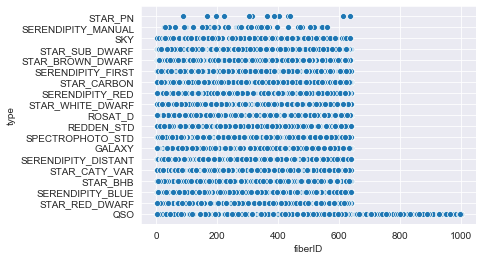

In [35]:
sns.scatterplot(train_x.iloc[:,0],train["type"],data=train)

In [36]:
train[train["type"]!="QSO"]["fiberID"].max()

640

### $\Rightarrow$ fiberID가 641 이상이면 QSO로 판단

In [246]:
train1 = train[train["fiberID"]<641].drop(["fiberMag_u","psfMag_u"],axis=1).reset_index(drop=True)
train1.shape

(184590, 20)

In [247]:
feature_col = train1.columns.difference(["type","fiberID"])
feature_col

Index(['fiberMag_g', 'fiberMag_i', 'fiberMag_r', 'fiberMag_z', 'modelMag_g',
       'modelMag_i', 'modelMag_r', 'modelMag_u', 'modelMag_z', 'petroMag_g',
       'petroMag_i', 'petroMag_r', 'petroMag_u', 'petroMag_z', 'psfMag_g',
       'psfMag_i', 'psfMag_r', 'psfMag_z'],
      dtype='object')

In [249]:
train_k = train1[feature_col][train1[feature_col] < -2000]
train_k1 = train1[feature_col][train1[feature_col] > 500]
train_yk = train1[["type","fiberID"]]
pre_index1 = list(train_k.dropna(how="all",axis=0).index)
pre_index2 = list(train_k1.dropna(how="all",axis=0).index)
train1 = train1.drop(pre_index1,axis=0)
train1 = train1.drop(pre_index2,axis=0)
train_yk = train_yk.drop(pre_index1)
train_yk = train_yk.drop(pre_index2)
new_train = pd.concat([train_yk,train1[feature_col]],axis=1)
print(new_train.shape)
new_train.head()

(184549, 20)


,type,fiberID,fiberMag_g,fiberMag_i,fiberMag_r,fiberMag_z,modelMag_g,modelMag_i,modelMag_r,modelMag_u,modelMag_z,petroMag_g,petroMag_i,petroMag_r,petroMag_u,petroMag_z,psfMag_g,psfMag_i,psfMag_r,psfMag_z
0,QSO,601,21.644453,21.387653,21.657571,21.572827,21.465534,21.020605,21.364187,22.749241,21.147340,21.431636,21.145409,21.478312,22.504317,20.422446,21.431953,21.176553,21.314148,21.171444
1,QSO,427,17.033098,17.095999,16.999682,17.076449,16.697434,16.660177,16.641249,17.818063,16.688928,16.738784,16.744210,16.688874,17.867253,16.808006,16.727898,16.694640,16.679677,16.641788
2,STAR_RED_DWARF,612,23.629122,19.861718,21.742750,18.810375,23.147993,19.487330,21.475342,24.877052,18.375655,22.426929,19.610012,21.673551,25.859229,18.376141,23.058767,19.504961,21.471406,18.389096
3,SERENDIPITY_BLUE,76,19.661686,19.928729,19.785276,19.877216,19.325313,19.598653,19.469356,19.899462,19.677858,19.390363,19.688197,19.552879,19.982358,19.799425,19.315942,19.600843,19.431752,19.674611
4,STAR_BHB,14,16.063400,15.834744,15.889851,15.847949,15.747645,15.500731,15.556542,17.037058,15.498295,15.804802,15.569017,15.625482,17.093958,15.593497,15.786268,15.500176,15.524910,15.527453


In [250]:
new_train.to_csv("new_train.csv")

In [254]:
remove_index = list(test[test["fiberID"]>640].index)
new_test = test[test["fiberID"]<641].drop(["fiberMag_u","psfMag_u"],axis=1)
new_test.to_csv("new_test.csv")

In [255]:
np.save("remove_index.npy",np.array(remove_index))

In [256]:
new_train.describe()

,fiberID,fiberMag_g,fiberMag_i,fiberMag_r,fiberMag_z,modelMag_g,modelMag_i,modelMag_r,modelMag_u,modelMag_z,petroMag_g,petroMag_i,petroMag_r,petroMag_u,petroMag_z,psfMag_g,psfMag_i,psfMag_r,psfMag_z
count,184549.000000,184549.000000,184549.000000,184549.000000,184549.000000,184549.000000,184549.000000,184549.000000,184549.000000,184549.000000,184549.000000,184549.000000,184549.000000,184549.000000,184549.000000,184549.000000,184549.000000,184549.000000,184549.000000
mean,322.406927,19.983242,18.930019,19.370775,18.664779,19.404975,18.343369,18.785674,20.630582,18.089768,19.458749,18.422928,18.852851,20.592915,18.198519,19.758895,18.722984,19.154047,18.451368
std,186.850193,1.863955,1.573308,1.692012,1.669604,1.974894,1.740973,1.839118,2.212392,1.802818,4.916156,2.250034,3.116637,4.777663,3.982589,2.098283,1.639588,2.244500,1.713400
min,1.000000,-8.294703,10.646672,-14.662435,-47.977183,8.686690,11.337467,10.286917,3.444448,4.460086,-1581.627834,-307.627762,-776.113687,-1131.081339,-789.601838,-335.608609,-30.711890,-493.822787,-106.927107
25%,160.000000,18.789316,17.797642,18.169943,17.506485,17.971886,16.889026,17.332288,19.165556,16.624690,18.009335,16.960767,17.386580,19.147628,16.717852,18.545761,17.625992,17.948385,17.320005
50%,324.000000,19.927376,18.973912,19.429166,18.509442,19.348227,18.321077,18.827194,20.276878,17.885697,19.388975,18.376950,18.867798,20.235940,17.955764,19.776629,18.873643,19.307021,18.385887
75%,485.000000,21.177025,20.138859,20.611860,19.920416,20.720230,19.747855,20.230747,21.868619,19.575595,20.759448,19.790981,20.281376,21.661096,19.575871,20.956053,19.891333,20.352315,19.683458
max,640.000000,37.745406,42.002047,32.574603,173.583776,59.987842,45.783550,35.102312,49.487277,61.597879,270.432463,219.701423,473.850080,320.078866,411.103073,102.124043,164.878940,54.501228,115.830481


In [257]:
new_test.describe()

,fiberID,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_g,fiberMag_r,fiberMag_i,fiberMag_z,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z
count,9264.000000,9264.000000,9264.000000,9264.000000,9264.000000,9264.000000,9264.000000,9264.000000,9264.000000,9264.000000,9264.000000,9264.000000,9264.000000,9264.000000,9264.000000,9264.000000,9264.000000,9264.000000,9264.000000
mean,322.303217,19.778122,19.152996,18.723843,18.460767,19.986609,19.366298,18.929525,18.665512,20.605833,19.324541,18.843126,18.436310,18.216283,20.638273,19.409686,18.784121,18.349799,18.098245
std,186.788859,2.638626,1.693267,1.674749,1.647940,1.885295,1.692126,1.576255,1.651926,2.847185,14.511068,1.955181,1.897203,2.314493,2.209626,1.967816,1.833594,1.740726,1.800721
min,1.000000,-42.663871,9.134712,-22.522266,13.349827,8.188752,12.288183,12.688984,-8.455932,-98.181975,-1348.068776,-23.908952,-8.356654,-64.917293,12.419765,13.617577,13.382832,12.955113,12.395695
25%,160.000000,18.531724,17.932378,17.624767,17.327473,18.775713,18.164374,17.808568,17.513662,19.151925,18.002045,17.382006,16.949954,16.722036,19.166936,17.959566,17.329003,16.878905,16.627671
50%,322.000000,19.788496,19.301488,18.873152,18.372227,19.930591,19.436321,18.952037,18.498412,20.247608,19.386741,18.852689,18.359800,17.962663,20.277374,19.342635,18.821162,18.309534,17.883531
75%,484.000000,20.962113,20.335776,19.893246,19.679431,21.182599,20.602391,20.140501,19.911186,21.666988,20.762396,20.258911,19.793663,19.592710,21.879749,20.705452,20.219501,19.746781,19.572969
max,640.000000,182.654452,27.823417,47.227391,34.946057,47.160580,29.266687,25.935036,26.478564,65.392087,106.962571,41.850633,52.221528,74.747394,32.641240,28.814977,27.579664,26.471555,24.461973


In [258]:
for i in range(test.shape[0]):
    if test.iloc[i,0] > 640:
        sample_submission.iloc[i,8] = 1

sample_submission.to_csv("sample_submission.csv")

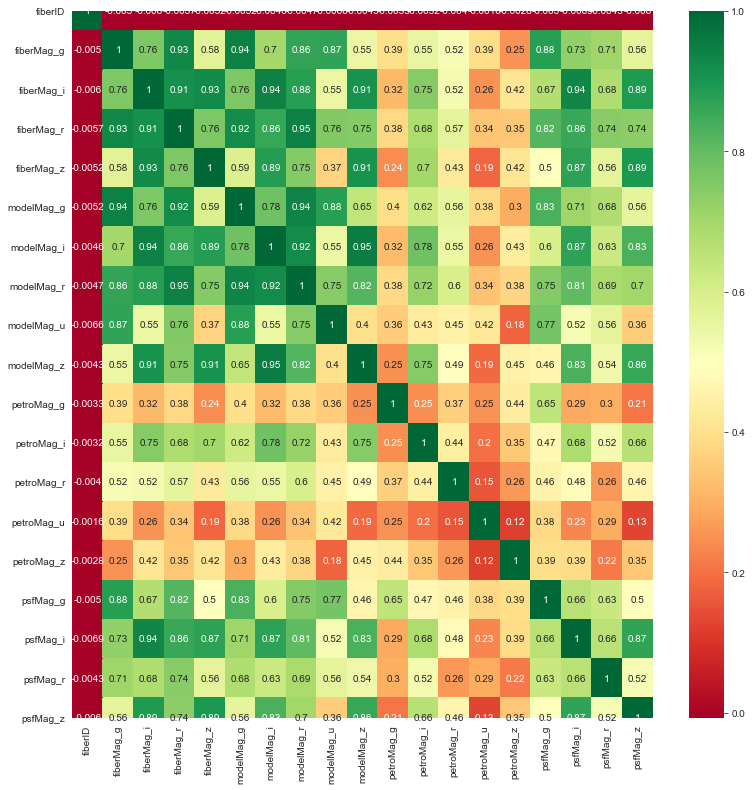

In [259]:
corrmat = new_train.corr()
plt.figure(figsize=(13,13))
g = sns.heatmap(corrmat,annot=True,cmap="RdYlGn")

<Figure size 1080x1080 with 0 Axes>

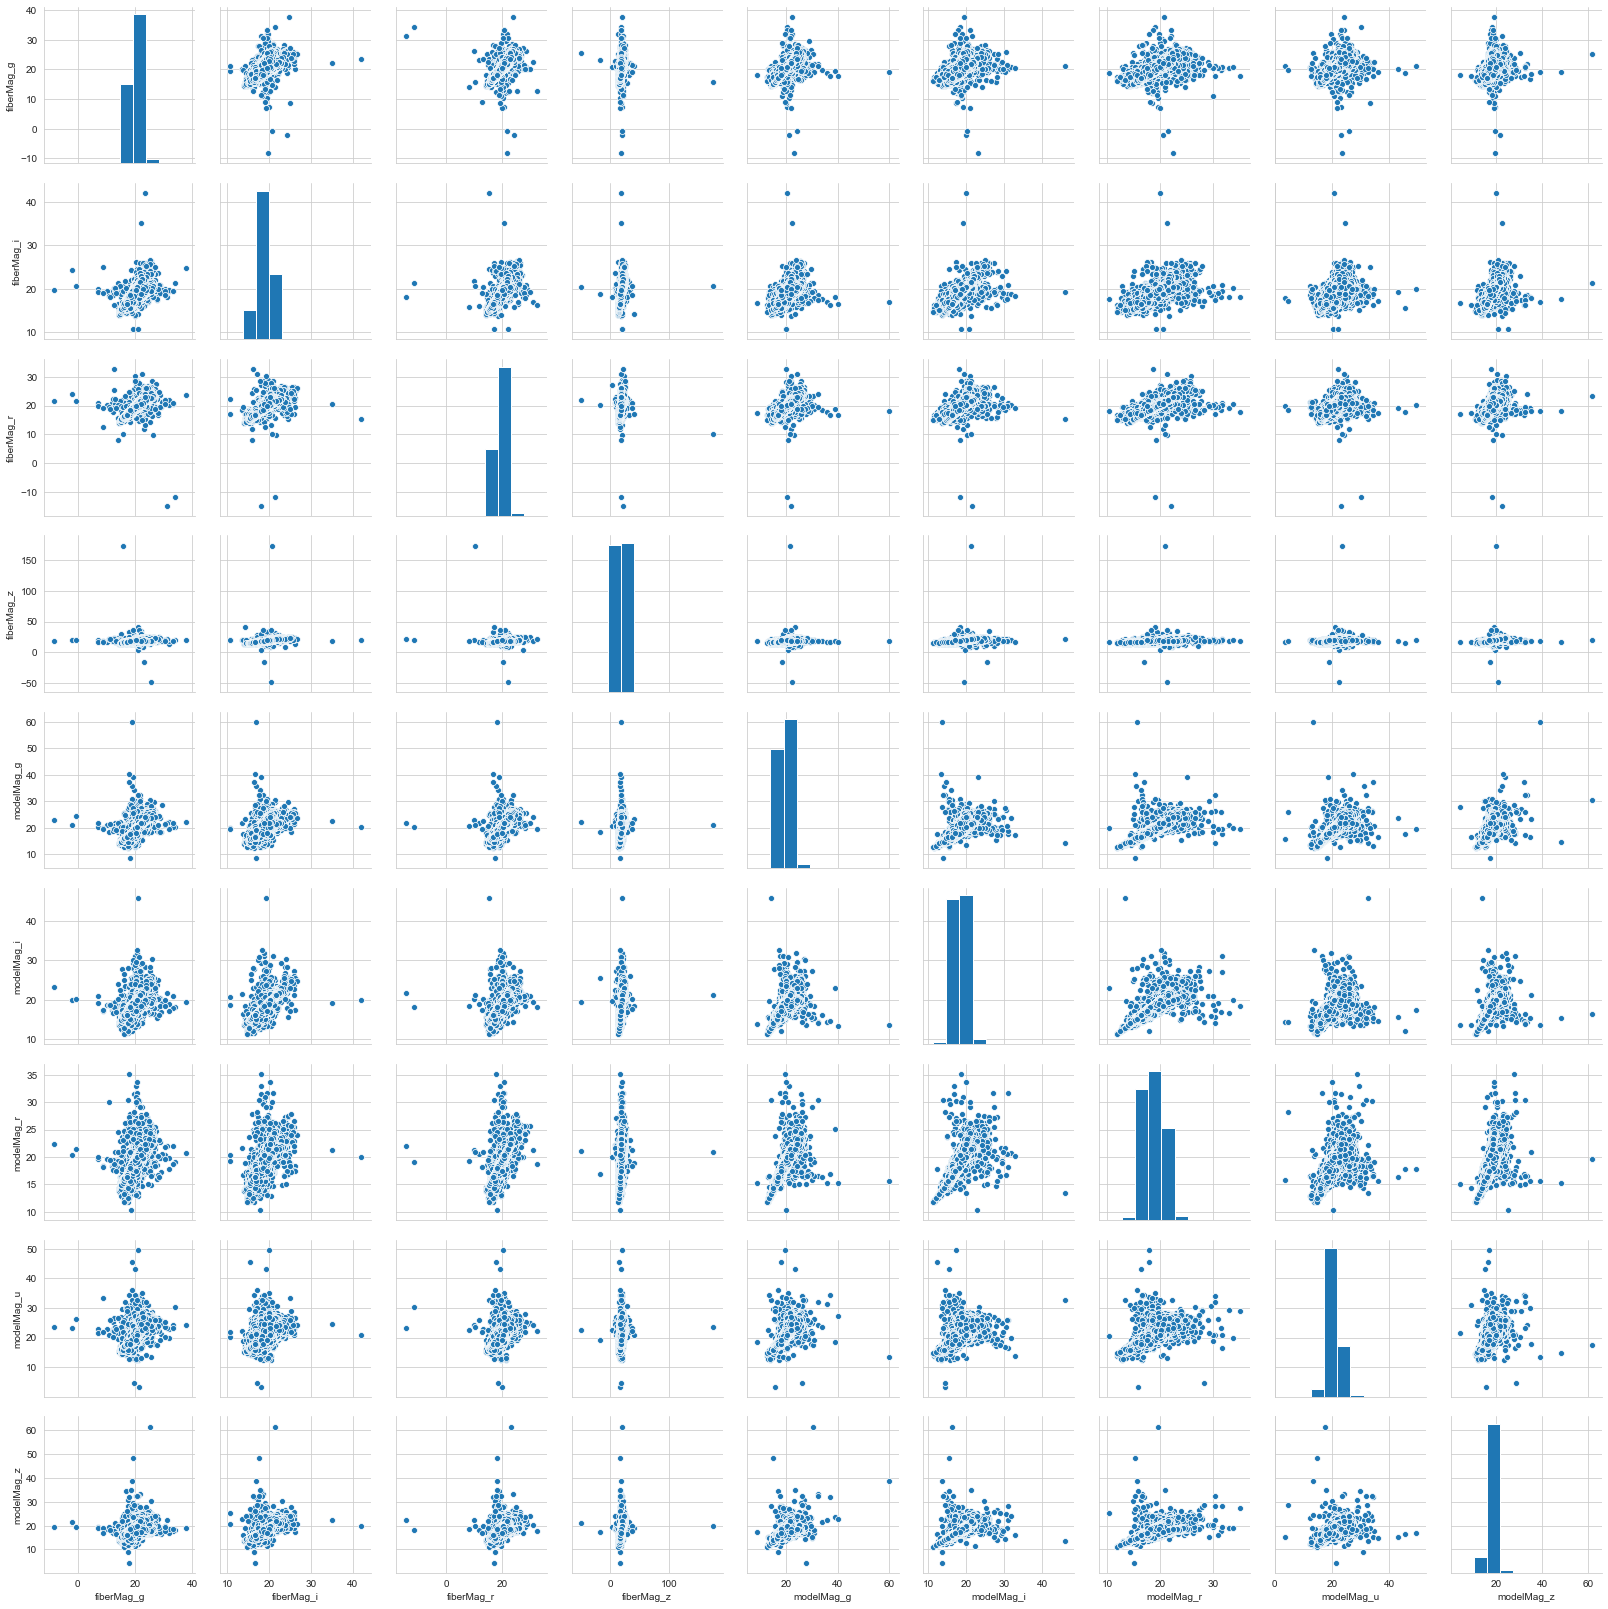

In [279]:
plt.figure(figsize=(15,15))
sns.pairplot(new_train.iloc[:,2:11])

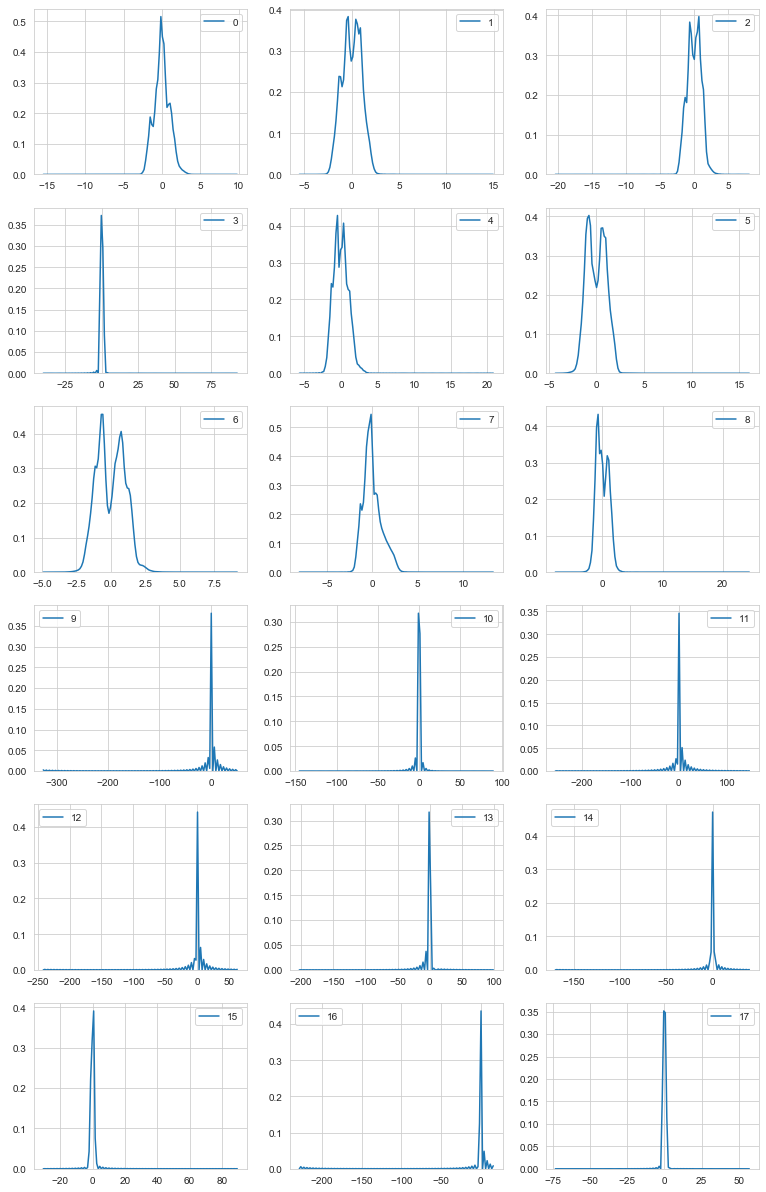

In [273]:
plt.figure(figsize=(13,25))
for i in range(18):
    plt.subplot(7,3,i+1)
    g = sns.kdeplot(pd.DataFrame(scaler.fit_transform(new_train[feature_col])).iloc[:,i],)

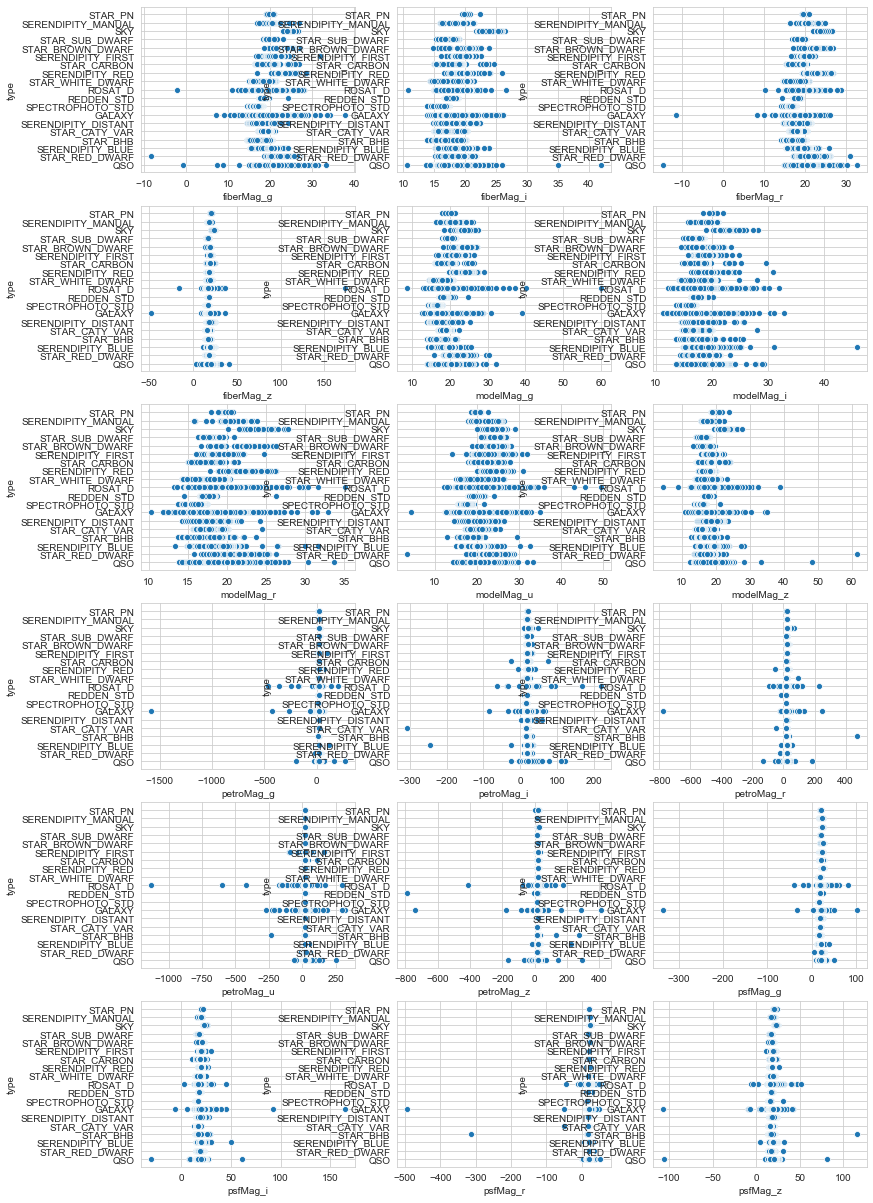

In [275]:
plt.figure(figsize=(13,25))
for i in range(18):
    plt.subplot(7,3,i+1)
    sns.scatterplot(new_train[feature_col].iloc[:,i],new_train["type"],data=train)

                      type
GALAXY               37329
QSO                  34276
SERENDIPITY_BLUE     21755
SPECTROPHOTO_STD     14629
REDDEN_STD           14616
STAR_RED_DWARF       13749
STAR_BHB             13495
SERENDIPITY_FIRST     7132
ROSAT_D               6576
STAR_CATY_VAR         6506
SERENDIPITY_DISTANT   4653
STAR_CARBON           3257
SERENDIPITY_RED       2561
STAR_WHITE_DWARF      2160
STAR_SUB_DWARF        1154
STAR_BROWN_DWARF       500
SKY                    127
SERENDIPITY_MANUAL      61
STAR_PN                 13


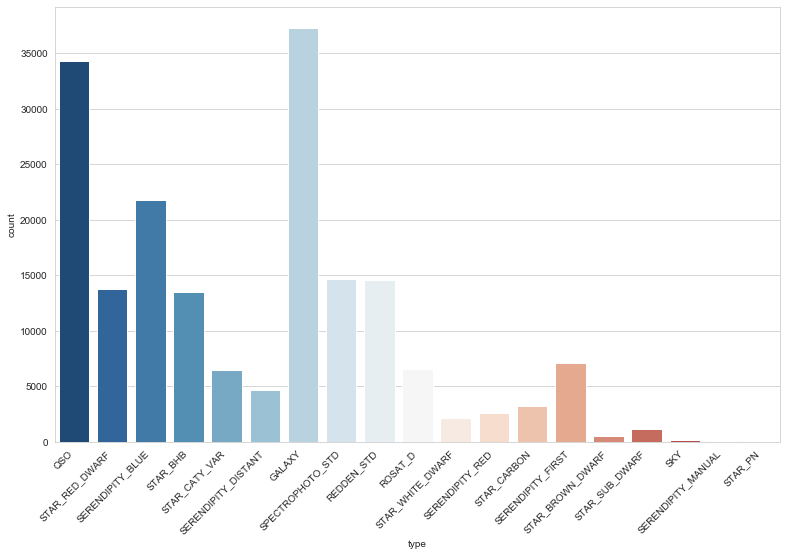

In [264]:
print(pd.DataFrame(new_train["type"].value_counts()))
plt.figure(figsize=(13,8))
plt.xticks(rotation =  45 ,horizontalalignment='right')
sns.set_style('whitegrid')
sns.countplot(x='type',data=new_train,palette='RdBu_r')

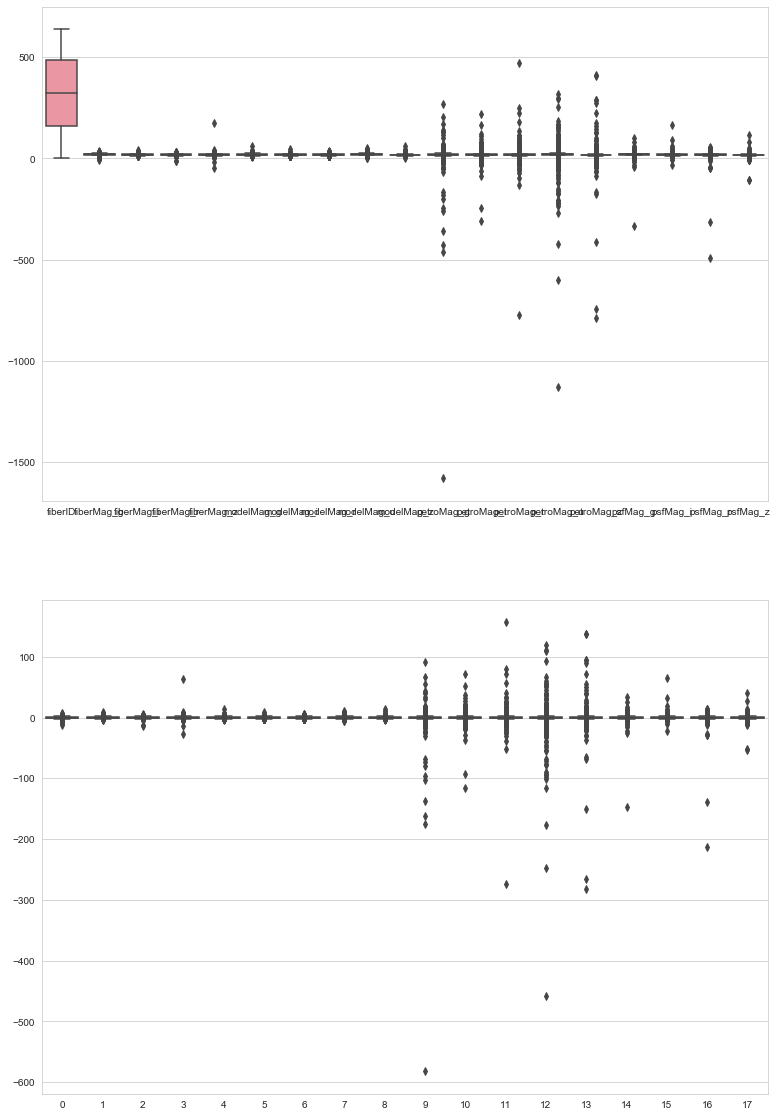

In [270]:
from sklearn.preprocessing import RobustScaler
scaler1 = RobustScaler()
plt.figure(figsize=(13,20))
plt.ylim(-50,50)
plt.subplot(211)
sns.boxplot(data=pd.DataFrame(new_train))
plt.subplot(212)
sns.boxplot(data=pd.DataFrame(scaler1.fit_transform(new_train[feature_col])))